In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('Clean Sales (2017-2018).csv', index_col=0, parse_dates=True)

In [3]:
#df.head()

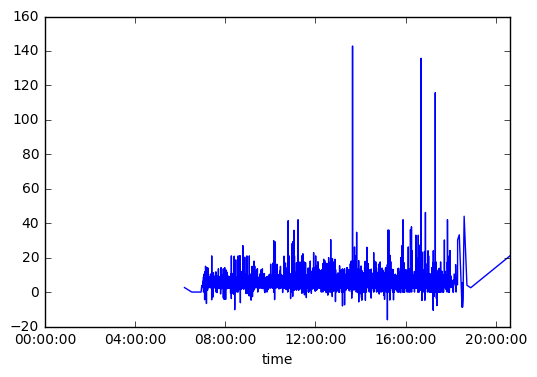

In [4]:
#Question 1) Determine sales amount by time of day & generate graph

#df.between_time('00:00:00','08:00:00')
#I'm not convinced by this method because only height of sales visible, not the density (frequency)
by_time = df['Net Sales'].groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)

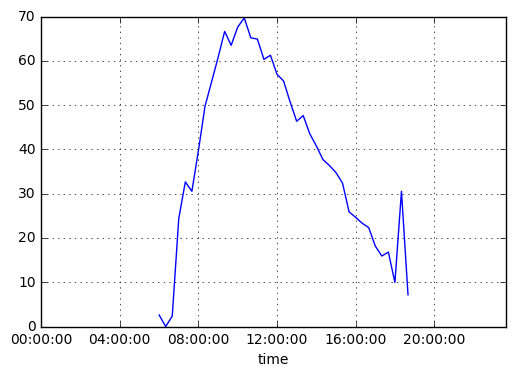

In [5]:
hourly = df['Net Sales'].resample('20min').sum()
#here, I learned that shorter the resampling period, the greater the noise caused by outliers.

#Graph for mean sales
by_time_mean = hourly.groupby(hourly.index.time).mean()
by_time_mean.plot(xticks=hourly_ticks, grid=True, y='Total Sales')


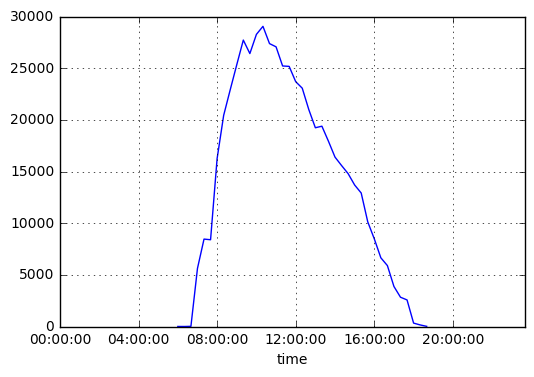

In [6]:
#Graph for total sales
by_time_sum = hourly.groupby(hourly.index.time).sum()
by_time_sum.plot(xticks=hourly_ticks, grid=True, y='Total Sales')

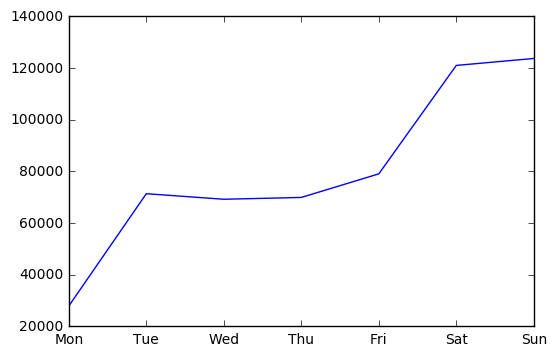

In [7]:
#Question 2) Sales amount by day of week

#Let's do sum first
weekday_names = "Mon Tue Wed Thu Fri Sat Sun Mon".split(' ')


daily = df['Net Sales'].resample('D').sum()

by_day_sum = daily.groupby(daily.index.dayofweek).sum()

by_day_sum.plot().set_xticklabels(weekday_names)
plt.show()

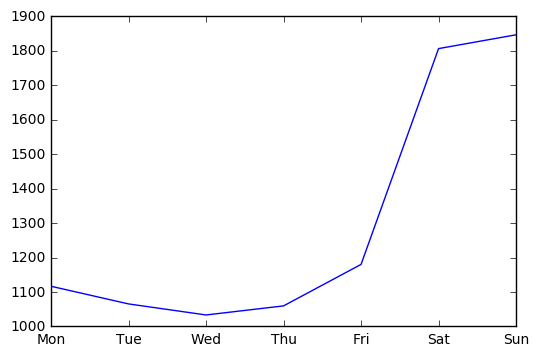

0    1116.622000
1    1065.389403
2    1033.322836
3    1059.683333
4    1180.103134
5    1806.619552
6    1846.731791
Name: Net Sales, dtype: float64

In [282]:
#Now the mean
by_day_mean = daily.groupby(daily.index.dayofweek).mean()
by_day_mean.plot().set_xticklabels(weekday_names)

plt.show()
by_day_mean


In [279]:
#Average revenue higher for Mondays but lower for total Mondays. Indicates many closed Mondays. Confirmed.

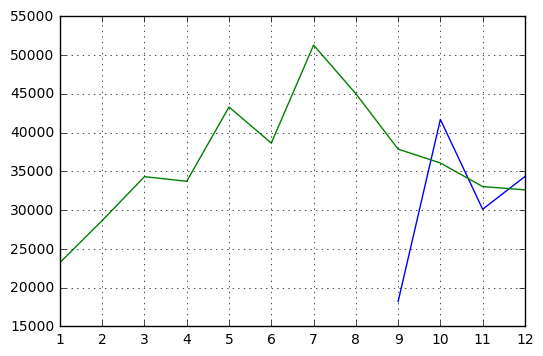

In [11]:
#Question 3) Let's do that whole thing all over again but by monthly. 
#Also, let's do 2017 and 2018 separately, for funsies


monthly = df['2017']['Net Sales'].resample('M').sum()
monthly2 = df['2018']['Net Sales'].resample('M').sum()

by_monthly_sum = monthly.groupby(monthly.index.month).sum()
by_monthly_sum2 = monthly2.groupby(monthly2.index.month).sum()

df1=pd.DataFrame([by_monthly_sum, by_monthly_sum2])

ax1 = by_monthly_sum.plot(xticks=np.arange(1,13),grid=True)
ax2 = by_monthly_sum2.plot(xticks=np.arange(1,13),grid=True)

plt.show()

#What should I do if there's way too many years though? Gotta find an alternative way.